# Load the Data

## Imports

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:

from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Helper methods

## Excel reader

In [4]:
def read_excel_file(file_path, skip_header):
    ## Boolean to apply skip_header
    try:
        if(skip_header):
            # Læser excel-filen ind i pandas dataframe
            df = pd.read_excel(file_path, skiprows=[0])
        else:
            df = pd.read_excel(file_path)
        return df

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

## Removing/fixing the header

In [5]:
# Fjerner header fra dataframe - men rettet til at gøre dette i reader'en gennem en true/false istedet
# def removeHeader(df):
    # dfNew = df.iloc[0:]
    # return dfNew

In [6]:
## Tester
# dfTest = read_excel_file('./Data/Wine/winequality-red.xlsx', True)

In [7]:
# dfTest.columns

## Check for negative values

In [8]:
def check_for_negative_values(df):
    """
    Check for negative values in each numeric column of the DataFrame.
    Returns a dictionary where keys are column names and values are True if negative values are found, False otherwise.
    """
    negative_values_dict = {}
    for column in df.select_dtypes(include='number').columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert column to numeric, coerce non-convertible values to NaN
        has_negative_values = (df[column] < 0).any()
        negative_values_dict[column] = has_negative_values
    return negative_values_dict

## Removing duplicates

In [9]:
def removeDuplicates(df):
    df.drop_duplicates(inplace=True)
    return df

## Show shape

In [10]:
def showShape(df):
    shape = df.shape
    print(f"Dataframe has {shape[0]} rows and {shape[1]} columns")

# Wine Data by type

## Redwine Data

In [11]:
# Load the dataset
file_path = './Data/Wine/winequality-red.xlsx'
raw_red_wine_data = read_excel_file(file_path, True)


red_wine_data = raw_red_wine_data.copy()

# Display information about the dataset
print(red_wine_data.info())

# Handling missing values
print("Number of missing values per column:")
print(red_wine_data.isnull().sum())

# Checking for negative values in the dataset
negative_values_info = check_for_negative_values(red_wine_data)

# Print the results
for column, has_negative_values in negative_values_info.items():
    if has_negative_values:
        print(f"Column '{column}' contains negative values.")
    else:
        print(f"No negative values found in column '{column}'.")

# After performing cleaning tasks, you may save the cleaned dataset to a new file
# wine_data.to_excel('cleaned_wine_data.xlsx', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
Number of missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residu

## Whitewine Data

In [12]:
# Load the dataset
file_path = './Data/Wine/winequality-white.xlsx'
raw_white_wine_data = read_excel_file(file_path, True)
white_wine_data = raw_white_wine_data.copy()

# Display information about the dataset
print(white_wine_data.info())

# Handling missing values
print("Number of missing values per column:")
print(white_wine_data.isnull().sum())

# Checking for negative values in the dataset
negative_values_info = check_for_negative_values(white_wine_data)

# Print the results
for column, has_negative_values in negative_values_info.items():
    if has_negative_values:
        print(f"Column '{column}' contains negative values.")
    else:
        print(f"No negative values found in column '{column}'.")

# After performing cleaning tasks, you may save the cleaned dataset to a new file
# wine_data.to_excel('cleaned_wine_data.xlsx', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
Number of missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residu

# Aggregated Wine Data

In [13]:
# tilføjer typer til columns
red_wine_data['type'] = 'red'
white_wine_data['type'] = 'white'
# nature_wine_Data['type'] = 'nature'

# Samler vores to dataframes
combined_wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

## One hot encoding før concat
encoded_type = pd.get_dummies(combined_wine_data['type'])

combined_wine_data.reset_index()

combined_wine_data.drop(columns=['type'], inplace=True)

combined_wine_data = combined_wine_data.join(encoded_type)


# Viser information om vores nye samlede datasæt
print(combined_wine_data.info())

# Viser de første rows i det nye samlede datasæt
print(combined_wine_data.head())

# Efter samling af datasæt, så kan denne køres for at lave en ny fil
# combined_wine_data.to_excel('combined_wine_data.xlsx', index=False)

### DIAGRAMMER TIL VISUALERING :)
# import matplotlib.pyplot as plt

### CORRRELATION MATRIX
# correlation_matrix = combined_wine_data.corr()

### TRY TO REDUCE 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red                   6497 non-null   bool   
 13  white                 6497 non-null   bool   
dtypes: bool(2), float64(11), int64(1)
memory usage: 621.9 KB
None
   fixed a

In [14]:
combined_wine_data.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red,white
490,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.9984,3.31,0.67,10.6,6,True,False


# Explore the data - explore the features of the old and new data

## First, find the number of rows and columns

In [15]:
# hvor mange kolonner/rækker har vi?
showShape(red_wine_data)

Dataframe has 1599 rows and 13 columns


In [16]:
# hvor mange kolonner/rækker har vi?
showShape(white_wine_data)

Dataframe has 4898 rows and 13 columns


In [17]:
# hvor mange kolonner/rækker har vi?
showShape(combined_wine_data)

Dataframe has 6497 rows and 14 columns


## Second, find the type of data in each column

In [18]:
combined_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red                        bool
white                      bool
dtype: object

## Calculate the descriptive statistics of the numeric data.

In [19]:
# Her bruger vi describe() til at tjekke for at beskrive dataen
combined_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Is the data normally distributed?



array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

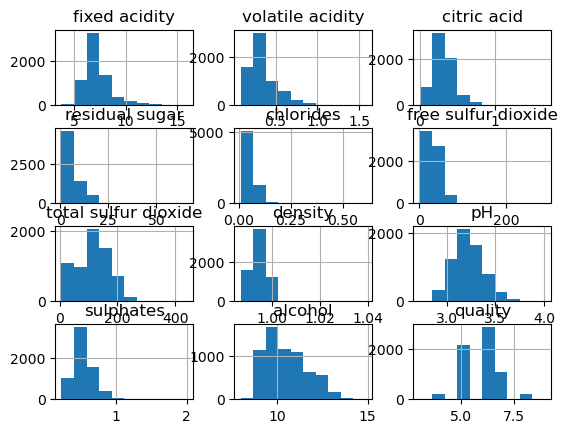

In [20]:
combined_wine_data.hist()

From what we gather from the data, the only type that's normally distributed it the "pH" type as it's the only that truly resembles a bellcurve.

## Plot diagrams that visualize the differences in red and white wine samples.

Regarding this question, we've tried a plethora of different methods to work this out, but we can't do it.

We've opted to do a histogram for each wine-type and then compare these to move on.

We'd love an explanation on how to do it in class.


In [21]:
#Simple shitty solution from https://stackoverflow.com/questions/31258134/how-to-plot-two-dataframe-on-same-graph-for-comparison

#df1 = red_wine_data
#df2 = white_wine_data
#DF = pd.concat([df1,df2],keys=['red', 'white'])
#DFGroup = DF.groupby(['quality','type'])
#DFGPlot = DFGroup.sum().unstack('type').plot(kind='bar')

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

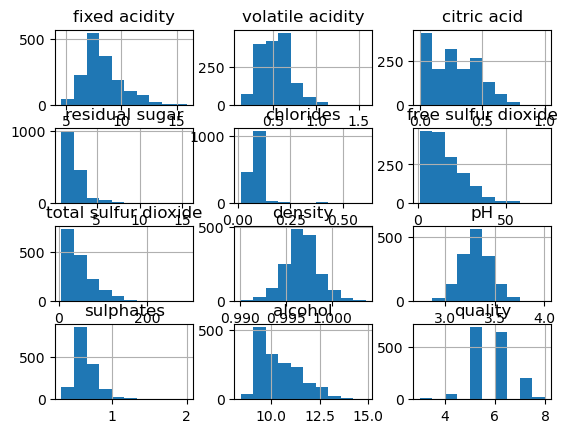

In [22]:
red_wine_data.hist()

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

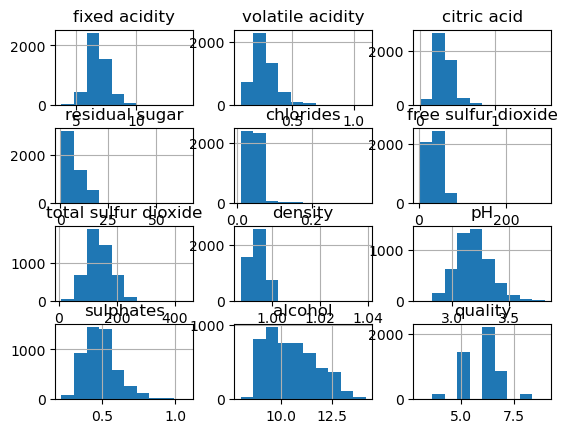

In [23]:
white_wine_data.hist()

a) Whats shown in the diagrams are the difference in content between the red and white wines.

b) We can tell from the diagrams that in regards to quality, the data of the content seems more spread, where as on the white wine, it seems a bit more concentrated.

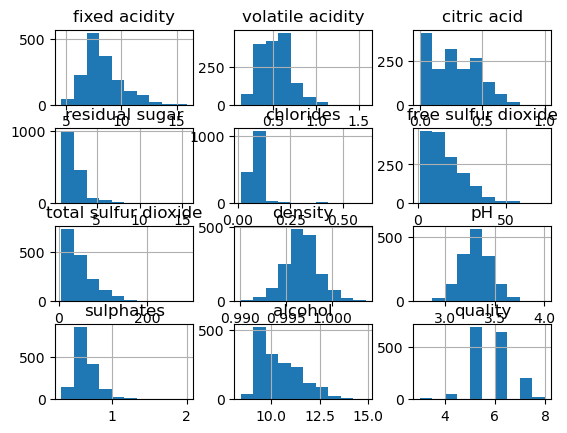
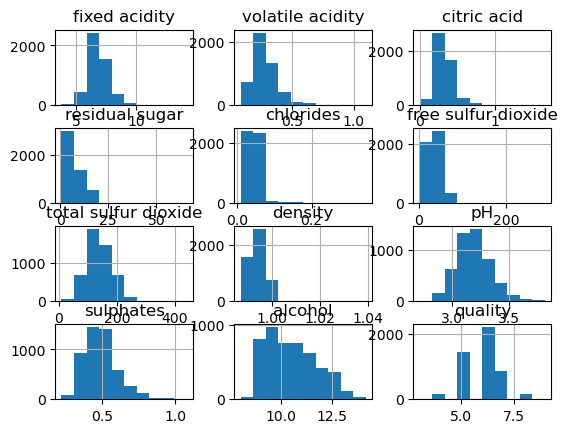

In [24]:
# c) 
# red whine has the lower average amount of alcohol
red_wine_data['alcohol'].mean()

10.422983114446529

In [25]:
# white wine has the higher average amount of alcohol
white_wine_data['alcohol'].mean()

10.514267047774602

In [26]:
# d)
# red wine has the lower average amount of residual sugar
red_wine_data['residual sugar'].mean()

2.53880550343965

In [27]:
# white wine has the higher average amount of residual sugar
white_wine_data['residual sugar'].mean()

6.391414863209474

## 7) Which other questions might be of interest for the wine consumers or distributers?

Age is a huge factor for most people, aswell as country of origin due to different sorts of grapes. Price is also great to compare with the other two.

## 8) Split the aggregated data into five subsets by binning the attribute pH. Identify the subset with the highest density? What if you split the data in ten subsets?

In [38]:
ph_subset = combined_wine_data[['pH']]

array([[<Axes: title={'center': 'pH'}>]], dtype=object)

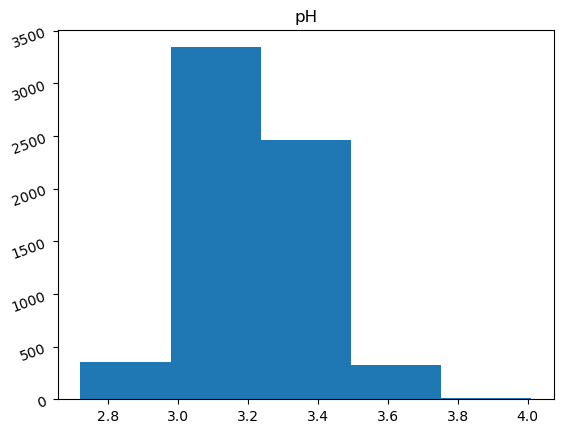

In [37]:
ph_subset.hist(column='pH', bins=5, grid=False)

We can see that the most frequent pH bin/subset is the 3.0-3.2 bin. Its aroudn the same for the 10 bins

array([[<Axes: title={'center': 'pH'}>]], dtype=object)

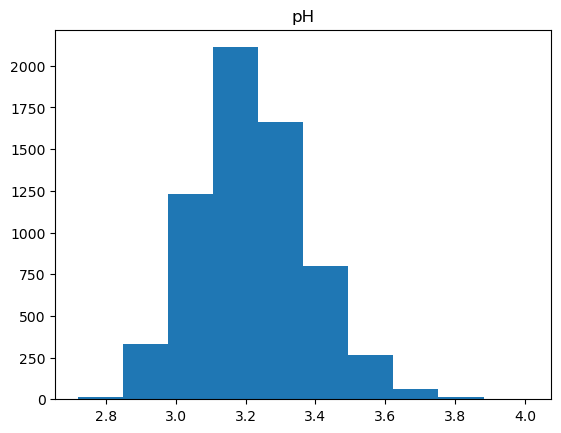

In [42]:
ph_subset.hist(column='pH', bins=10, grid=False)

### 9) Create a heat map or a correlation matrix of all data and investigate it. Can you tell which vine attribute has the biggest influence on the wine quality? 
### Which has the lowest?

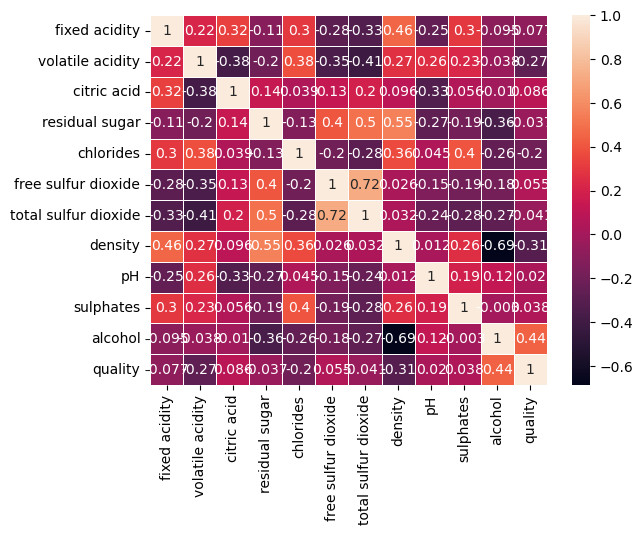

In [51]:
heatmap_data = combined_wine_data.copy()
heatmap_data.drop(columns=['red', 'white'], inplace=True)

heatmap_data_correlation_matrix = heatmap_data.corr()
heatmap = sns.heatmap(heatmap_data_correlation_matrix, annot=True, linewidths=.5)

The highest correlation is between alcohol and quality (0.44), and the next highest is between alcohol and density (0.31). 
The lowest correlation is between residual pH and quality (-0.02).

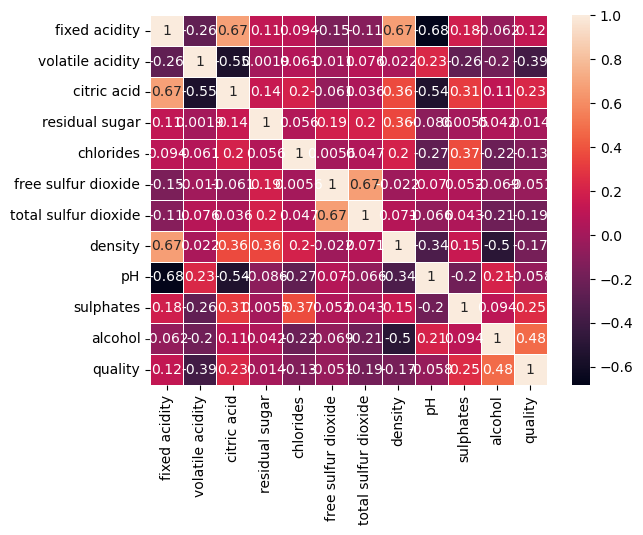

In [52]:
heatmap_data_red = red_wine_data.copy()
heatmap_data_red.drop(columns=['type'], inplace=True)

heatmap_data_red_correlation_matrix = heatmap_data_red.corr()
heatmap_red = sns.heatmap(heatmap_data_red_correlation_matrix, annot=True, linewidths=.5)

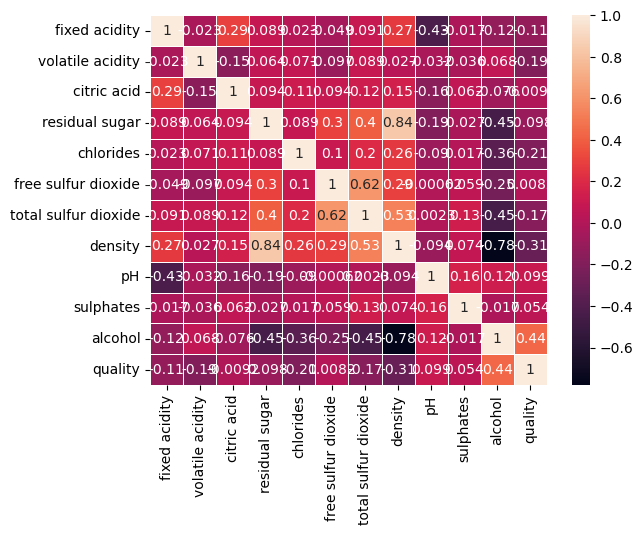

In [54]:
heatmap_data_white = white_wine_data.copy()
heatmap_data_white.drop(columns=['type'], inplace=True)

heatmap_data_white_correlation_matrix = heatmap_data_white.corr()
heatmap_white = sns.heatmap(heatmap_data_white_correlation_matrix, annot=True, linewidths=.5)

### Do you get the same results when you analyze the red and white wine data sets separately?

No, the correlation changes if we do them separately.

### 10) Explore the feature ‘residual sugar’. Is there any outlier (a value much different from the rest)?
### On which row is it found? Remove that row.

<Axes: ylabel='residual sugar'>

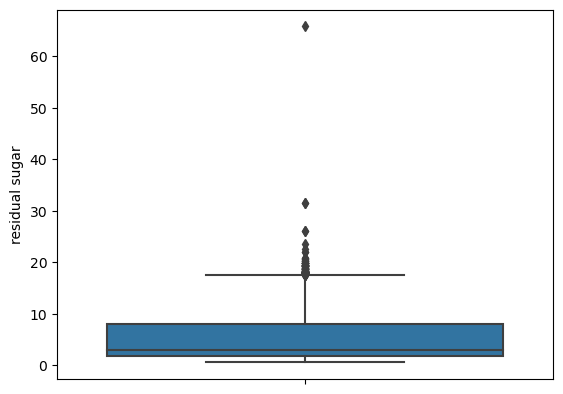

In [68]:
# Here we create a dataset that only has the columns we want to use
residual_sugar_subset = combined_wine_data[['residual sugar']]
sns.boxplot(data=residual_sugar_subset, y='residual sugar')

We can see that the outlier is above 50 in the boxplot, that has a lot higher value then the rest of the data.

Outlier index: 4380


C:\Users\Cat\AppData\Local\Temp\ipykernel_3396\2336607206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residual_sugar_subset.drop(index=outlier_index, inplace=True)


<Axes: ylabel='residual sugar'>

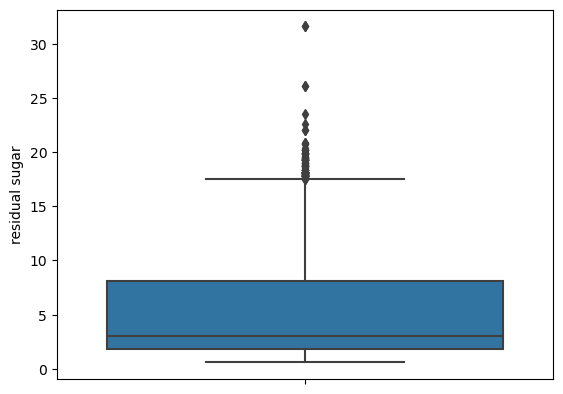

In [69]:
# We can see that the outlier is above 50, so can find the row that has this value
outlier_index = residual_sugar_subset[residual_sugar_subset['residual sugar'] > 50].index.item()
print(f"Outlier index: {outlier_index}")
residual_sugar_subset.drop(index=outlier_index, inplace=True)
sns.boxplot(data=residual_sugar_subset, y='residual sugar')


The outlier is found on row 4380. So we remove that row.

### 11) Identify the attribute with the lowest correlation to the wine quality and remove it.

<Axes: >

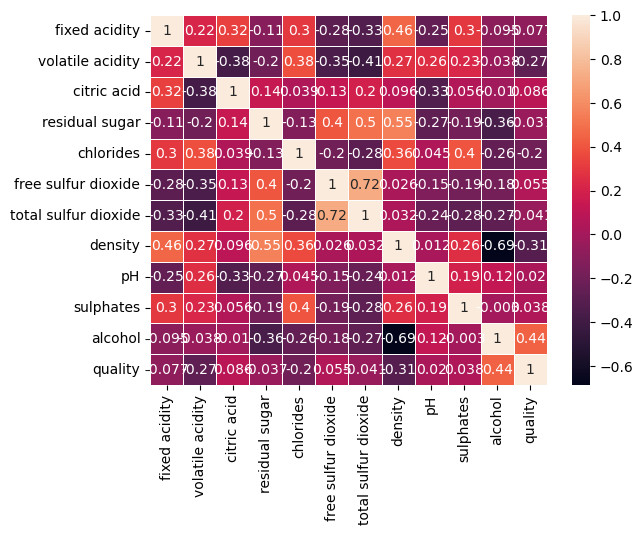

In [71]:
sns.heatmap(heatmap_data_correlation_matrix, annot=True, linewidths=.5)

We can see in the heatmap that the lowest correlation is between ph and quality (0.02). So we remove that column.

In [72]:
combined_wine_data.drop(columns=['pH'], inplace=True)

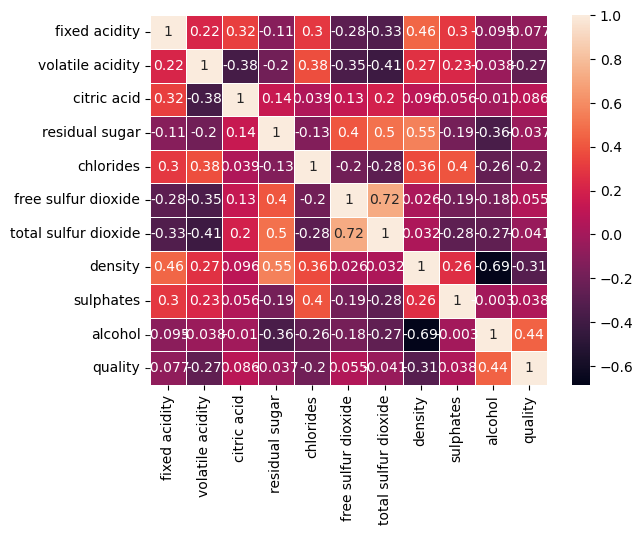

In [74]:
heatmap_data = combined_wine_data.copy()
heatmap_data.drop(columns=['red', 'white'], inplace=True)

heatmap_data_correlation_matrix = heatmap_data.corr()
heatmap = sns.heatmap(heatmap_data_correlation_matrix, annot=True, linewidths=.5)

### 12) Transform the categorical data into numeric
Done? We use One Hot Encoding to transform the categorical data into numeric/boolean.

In [75]:
combined_wine_data.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,red,white
2097,5.7,0.335,0.34,1.0,0.04,13.0,174.0,0.992,0.66,10.0,5,False,True


### 13) Try to reduce the number of features of the aggregated data set by applying principal component analysis (PCA). What is the optimal number of components?

In [78]:
input_data = combined_wine_data.values

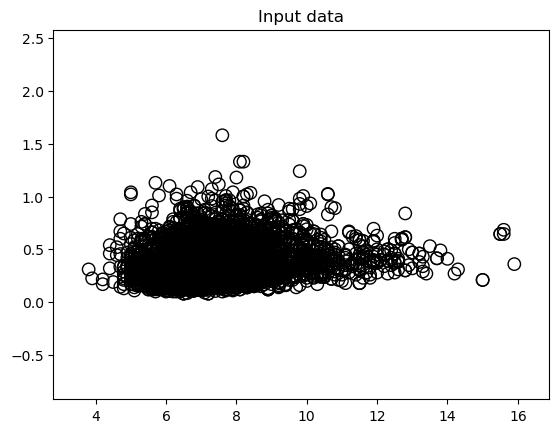

In [79]:
# Plot the data
plt.figure()
plt.title('Input data')

# calculate the range of coordinates
x_min, x_max = input_data[:, 0].min() - 1, input_data[:, 0].max() + 1
y_min, y_max = input_data[:, 1].min() - 1, input_data[:, 1].max() + 1

# plot coordinates
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot the points
plt.scatter(input_data[:,0], input_data[:,1], color='black', s=80, marker='o', facecolors='none')

plt.show()

In [84]:
nl1 = prep.normalize(input_data, norm='l1')

In [85]:
nl2 = prep.normalize(input_data, norm='l2')

In [92]:
sc = StandardScaler()  
input_data_sc = sc.fit_transform(input_data)

In [94]:
pca = PCA(n_components=4)
pca_data = pca.fit_transform(input_data_sc)

In [95]:
pcadf = pd.DataFrame(data = pca_data, columns = ['pc 1', 'pc 2', 'pc 3', 'pc 4'])
pcadf

,pc 1,pc 2,pc 3,pc 4
0,3.952281,0.257721,-2.528786,-0.130003
1,4.241923,0.532204,-2.468534,-1.000524
2,4.149119,0.331666,-2.099785,-0.477209
3,3.220373,0.918603,2.697447,1.237173
4,3.952281,0.257721,-2.528786,-0.130003
...,...,...,...,...
6492,-0.971007,-1.803851,-0.146049,0.384326
6493,-1.633999,1.369222,-0.598765,0.161791
6494,-0.930443,-0.711339,-0.885884,0.322346
6495,-1.604025,-3.445541,-0.133806,-0.074846


In [96]:
explained_variance = pca.explained_variance_ratio_  
explained_variance

array([0.35546226, 0.20026405, 0.11447063, 0.07288077])

C:\Users\Cat\AppData\Local\Temp\ipykernel_3396\1047061413.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(explained_variance, 'bx-', c='red')


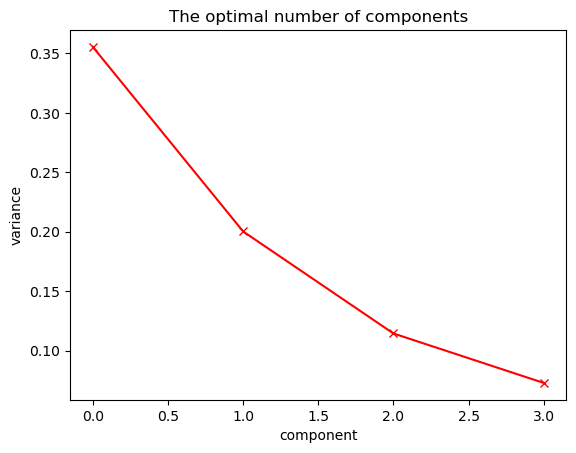

In [97]:
# Plot the explained_variance
plt.plot(explained_variance, 'bx-', c='red')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

C:\Users\Cat\AppData\Local\Temp\ipykernel_3396\1148483022.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b*-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(cumulative, 'b*-', c='green')


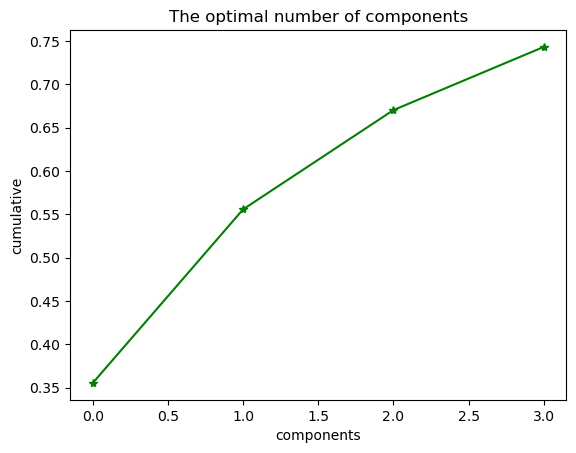

In [98]:
# Plot the cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-', c='green')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

We followed the PCA code notebook, but don't understand how to interpret the results.

### 14) Print out ten random rows from the final dataset as a prove of concept.

So this the the result of dataset without the PCA reduction.

In [76]:
combined_wine_data.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality,red,white
3520,7.6,0.130,0.34,9.3,0.062,40.0,126.0,0.99660,0.39,9.6,5,False,True
2811,7.6,0.320,0.36,1.6,0.040,32.0,155.0,0.99300,0.52,11.3,6,False,True
4735,5.6,0.190,0.27,0.9,0.040,52.0,103.0,0.99026,0.39,11.2,5,False,True
2094,5.7,0.440,0.13,7.0,0.025,28.0,173.0,0.99130,0.48,12.5,6,False,True
129,6.1,0.380,0.15,1.8,0.072,6.0,19.0,0.99550,0.57,9.4,5,True,False
5185,5.8,0.280,0.28,4.2,0.044,52.0,158.0,0.99200,0.44,10.7,7,False,True
3498,6.7,0.440,0.31,1.9,0.030,41.0,104.0,0.99000,0.62,12.6,7,False,True
5323,5.4,0.255,0.33,1.2,0.051,29.0,122.0,0.99048,0.66,11.3,6,False,True
5769,7.4,0.160,0.30,13.7,0.056,33.0,168.0,0.99825,0.44,8.7,7,False,True
4127,6.4,0.160,0.37,1.5,0.037,27.0,109.0,0.99345,0.50,9.8,6,False,True
